In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import drive

In [41]:
import pandas as pd

dataset=pd.read_csv('/content/data-10',sep='\t')

In [42]:
dataset.head()

,DATE,TIME,CODE,VALUE
0,02-18-1989,08:00,58,161.0
1,02-18-1989,08:00,33,2.0
2,02-18-1989,08:00,34,8.0
3,02-18-1989,12:00,60,72.0
4,02-18-1989,18:00,62,270.0


In [43]:
df= (
    dataset.pivot_table(index=dataset.groupby('CODE').cumcount(),
                   columns='CODE',
                   values='VALUE')
        .add_prefix('')
        .rename_axis(columns=None)
)

In [44]:
df.head()

,33,34,48,58,60,62
0,2.0,8.0,238.0,161.0,72.0,270.0
1,2.0,8.0,105.0,147.0,176.0,197.0
2,2.0,5.0,123.0,245.0,294.0,265.0
3,3.0,8.0,119.0,302.0,73.0,168.0
4,3.0,5.0,100.0,161.0,147.0,216.0


In [86]:
df=df[:15]

In [87]:
df = df.rename(columns={'33': 'Regular insulin dose','34': 'NPH insulin dose','48': 'Unspecified blood glucose measurement','58': 'Pre-breakfast blood glucose measurement','60': 'Pre-lunch blood glucose measurement','62': 'Pre-supper blood glucose measurement' })

In [88]:
df.head()

,Regular insulin dose,NPH insulin dose,Unspecified blood glucose measurement,Pre-breakfast blood glucose measurement,Pre-lunch blood glucose measurement,Pre-supper blood glucose measurement
0,2.0,8.0,238.0,161.0,72.0,270.0
1,2.0,8.0,105.0,147.0,176.0,197.0
2,2.0,5.0,123.0,245.0,294.0,265.0
3,3.0,8.0,119.0,302.0,73.0,168.0
4,3.0,5.0,100.0,161.0,147.0,216.0


In [89]:
df.mean()

Regular insulin dose                         2.400000
NPH insulin dose                             5.800000
Unspecified blood glucose measurement      206.400000
Pre-breakfast blood glucose measurement    201.400000
Pre-lunch blood glucose measurement        158.333333
Pre-supper blood glucose measurement       226.866667
dtype: float64

In [90]:
df.median()

Regular insulin dose                         2.0
NPH insulin dose                             7.0
Unspecified blood glucose measurement      219.0
Pre-breakfast blood glucose measurement    187.0
Pre-lunch blood glucose measurement        147.0
Pre-supper blood glucose measurement       249.0
dtype: float64

In [91]:
import statistics
from statistics import StatisticsError
for col in df:
  print(col, end="\t")
  try:
    modedata=statistics.mode(df[col])
  except StatisticsError:
    print ("No unique mode found")

Regular insulin dose	NPH insulin dose	Unspecified blood glucose measurement	No unique mode found
Pre-breakfast blood glucose measurement	No unique mode found
Pre-lunch blood glucose measurement	Pre-supper blood glucose measurement	No unique mode found


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


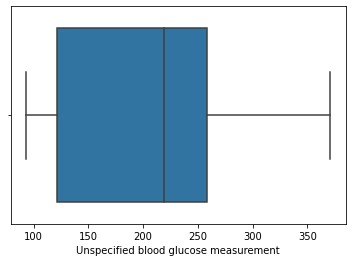

In [92]:
sb.boxplot(df['Unspecified blood glucose measurement'])

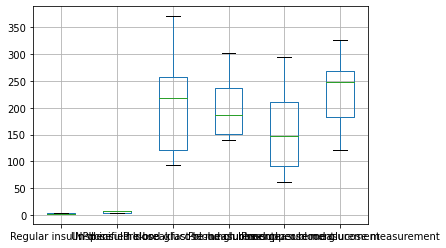

In [93]:
df.boxplot(column=['Regular insulin dose','NPH insulin dose','Unspecified blood glucose measurement','Pre-breakfast blood glucose measurement','Pre-lunch blood glucose measurement','Pre-supper blood glucose measurement'])

In [94]:
for col in df:
  print(" ")
  data = df[col]
  np.sort(data)
  q1, q3= np.percentile(data,[25,75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr) 
  upper_bound = q3 + (1.5 * iqr) 
  print('=> ',col)
  print(" ")
  print("Lower bound",lower_bound)
  print("upper ",upper_bound)
  print("Outliers")
  for i in data:
    if i < lower_bound or i > upper_bound:
      
      print("     ",i)

 
=>  Regular insulin dose
 
Lower bound 0.5
upper  4.5
Outliers
 
=>  NPH insulin dose
 
Lower bound -3.25
upper  14.75
Outliers
 
=>  Unspecified blood glucose measurement
 
Lower bound -84.5
upper  463.5
Outliers
 
=>  Pre-breakfast blood glucose measurement
 
Lower bound 22.75
upper  364.75
Outliers
 
=>  Pre-lunch blood glucose measurement
 
Lower bound -87.5
upper  388.5
Outliers
 
=>  Pre-supper blood glucose measurement
 
Lower bound 53.5
upper  397.5
Outliers


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Regular insulin dose                     15 non-null     float64
 1   NPH insulin dose                         15 non-null     float64
 2   Unspecified blood glucose measurement    15 non-null     float64
 3   Pre-breakfast blood glucose measurement  15 non-null     float64
 4   Pre-lunch blood glucose measurement      15 non-null     float64
 5   Pre-supper blood glucose measurement     15 non-null     float64
dtypes: float64(6)
memory usage: 840.0 bytes


In [96]:
sp=df[:15]
sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Regular insulin dose                     15 non-null     float64
 1   NPH insulin dose                         15 non-null     float64
 2   Unspecified blood glucose measurement    15 non-null     float64
 3   Pre-breakfast blood glucose measurement  15 non-null     float64
 4   Pre-lunch blood glucose measurement      15 non-null     float64
 5   Pre-supper blood glucose measurement     15 non-null     float64
dtypes: float64(6)
memory usage: 840.0 bytes


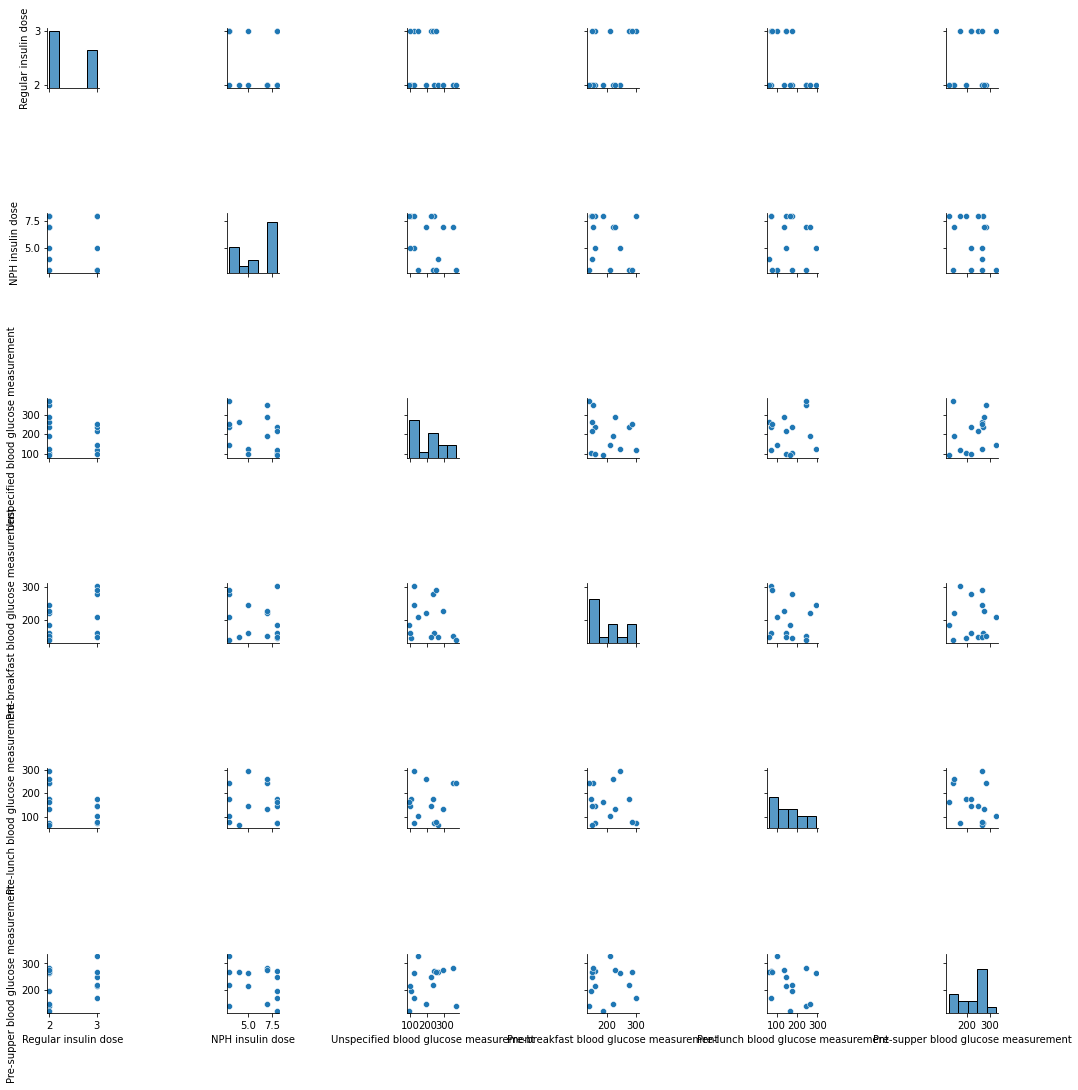

In [97]:
sb.pairplot(sp,kind='scatter')

In [98]:
sp.corr()

,Regular insulin dose,NPH insulin dose,Unspecified blood glucose measurement,Pre-breakfast blood glucose measurement,Pre-lunch blood glucose measurement,Pre-supper blood glucose measurement
Regular insulin dose,1.000000,-0.315244,-0.261514,0.453617,-0.427991,0.188753
NPH insulin dose,-0.315244,1.000000,-0.278238,-0.211311,0.007989,-0.258817
Unspecified blood glucose measurement,-0.261514,-0.278238,1.000000,-0.215172,0.102645,0.205549
Pre-breakfast blood glucose measurement,0.453617,-0.211311,-0.215172,1.000000,-0.149203,0.005432
Pre-lunch blood glucose measurement,-0.427991,0.007989,0.102645,-0.149203,1.000000,-0.306416
Pre-supper blood glucose measurement,0.188753,-0.258817,0.205549,0.005432,-0.306416,1.000000


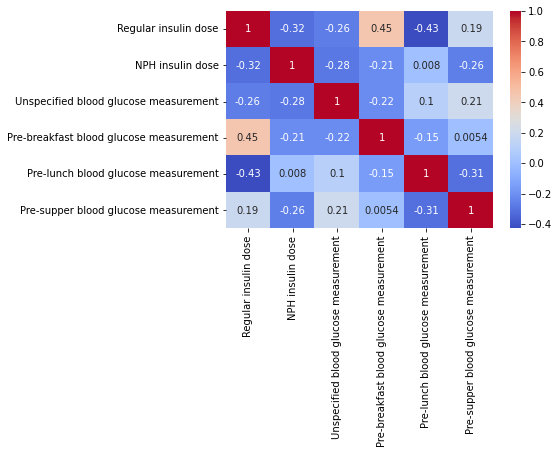

In [99]:
sb.heatmap(sp.corr(), cmap='coolwarm',annot=True)

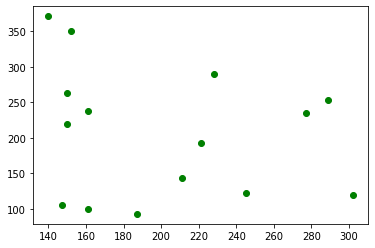

In [100]:
plt.scatter(sp['Pre-breakfast blood glucose measurement'], sp['Unspecified blood glucose measurement'],color='green')
plt.show()

In [101]:
x=sp['Pre-breakfast blood glucose measurement']
y=sp['Unspecified blood glucose measurement']

In [102]:
n=len(x)
sxy,sx2=0,0
sx,sy=0,0
for i in range(0,n):
  sx+=x[i]
  sy+=y[i]
  m=x[i]*y[i]
  sxy+=m
  sx2+=(x[i]*x[i])
up=(n*sxy)-(sx*sy)
dn=(n*sx2)-(sx*sx)
slope=up/dn
intercept=(sy/n)-(slope*(sx/n))
print(round(slope,3))
print(round(intercept,3))
def fun(x):
  equ=(slope*x)+(intercept)
  return equ
print("Equation : ",round(slope,3) ,"* x +",round(intercept,3))
print(fun(100))

-0.346
276.105
Equation :  -0.346 * x + 276.105
241.49491909181575


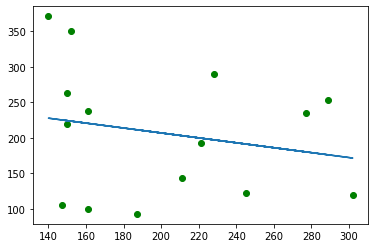

In [103]:
plt.scatter(x, y,color='green')
def myfunc(x):
  return slope * x + intercept
new = list(map(myfunc, x))
plt.plot(x,new)
plt.show()